In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
#reading csv file
#imported the dataset that is being cleaned in phase1
df = pd.read_csv('creditcards_new.csv')

In [3]:
df= pd.get_dummies(df, columns=['Sex','Marriage','Education'])

In [4]:
X = df[['Limit_Balance', 'Age', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5',
       'Pay_6', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Bill_Amount4',
       'Bill_Amount5', 'Bill_Amount6', 'Pay_Amount1', 'Pay_Amount2',
       'Pay_Amount3', 'Pay_Amount4', 'Pay_Amount5', 'Pay_Amount6', 'Sex_1', 'Sex_2', 'Marriage_1',
       'Marriage_2', 'Marriage_3', 'Education_1', 'Education_2',
       'Education_3']]
y = df['Default_Payment_Next_Month']

In [5]:
#testing and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=43)

### XG Boost

XGBoost is a highly efficient and flexible gradient boosting library used for optimal distributed processing. It is known for its speed, portability, and effectiveness in combining weak models to create a more robust predictive model. It can be used to solve Classification, Regression and user defined challenges.

Ref: https://xgboost.readthedocs.io/en/stable/
     https://www.simplilearn.com/what-is-xgboost-algorithm-in-machine-learning-article#:~:text=You%20can%20use%20XGBoost%20for,of%20your%20model%2Dbuilding%20process.

In [6]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
#fitting the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

pip install xgboost

In [7]:
#predicting the model
y_pred = xgb.predict(X_test)

In [8]:
#performance metrics
print("Accuracy", accuracy_score(y_test, y_pred))
print("Recall", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score", f1_score(y_test, y_pred, average='weighted'))

Accuracy 0.8056823947234906
Recall 0.8056823947234906
F1 Score 0.7825127817489552


In [9]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[4318,  267],
       [ 882,  446]])

In [10]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4585
           1       0.63      0.34      0.44      1328

    accuracy                           0.81      5913
   macro avg       0.73      0.64      0.66      5913
weighted avg       0.78      0.81      0.78      5913



### Extreme Machine Learning

Extreme Machine Learning Model (MLP Classifier) is a machine learning paradigm that emphasizes fast and efficient training of neural networks. 
Unlike traditional methods, Extreme Machine Learning Model randomly assigns input weight and optimizes only the output weights, making it particularly suitable for large-scale and high-dimensional data.


In [11]:
#Oversampling to handle imbalanced dataset 
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [12]:
#traing and validation sets
X_train_, X_valid = X_train_sm[:30000], X_train_sm[30000:]
y_train_, y_valid = y_train_sm[:30000], y_train_sm[30000:]

In [13]:
#Scaling the sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)

In [14]:
from keras.models import Sequential
from keras.layers import Dense

#Sequential model
eml = Sequential()

#First layer
eml.add(Dense(28, activation='relu',input_shape=(28,28)))

#Second layer
eml.add(Dense(16, activation='relu'))

#third layer
eml.add(Dense(16, activation='sigmoid'))

#fourth layer
eml.add(Dense(units=1, activation='sigmoid'))

# compiling the model
eml.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
eml.build()
eml.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 28)            812       
                                                                 
 dense_1 (Dense)             (None, 28, 16)            464       
                                                                 
 dense_2 (Dense)             (None, 28, 16)            272       
                                                                 
 dense_3 (Dense)             (None, 28, 1)             17        
                                                                 
Total params: 1565 (6.11 KB)
Trainable params: 1565 (6.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
#fitting the model
eml.fit(X_train_scaled, y_train_, epochs=10, batch_size=16, validation_data=(X_valid_scaled, y_valid))


Epoch 1/10
1875/1875 [==============================] - 1s 682us/step - loss: 0.4520 - accuracy: 0.8023 - val_loss: 0.1741 - val_accuracy: 0.9093
Epoch 2/10
1875/1875 [==============================] - 1s 431us/step - loss: 0.3925 - accuracy: 0.8330 - val_loss: 0.1594 - val_accuracy: 0.9098
Epoch 3/10
1875/1875 [==============================] - 1s 432us/step - loss: 0.3868 - accuracy: 0.8351 - val_loss: 0.1758 - val_accuracy: 0.9120
Epoch 4/10
1875/1875 [==============================] - 1s 432us/step - loss: 0.3831 - accuracy: 0.8356 - val_loss: 0.1801 - val_accuracy: 0.9045
Epoch 5/10
1875/1875 [==============================] - 1s 465us/step - loss: 0.3817 - accuracy: 0.8374 - val_loss: 0.1750 - val_accuracy: 0.9045
Epoch 6/10
1875/1875 [==============================] - 1s 432us/step - loss: 0.3804 - accuracy: 0.8368 - val_loss: 0.1862 - val_accuracy: 0.9014
Epoch 7/10
1875/1875 [==============================] - 1s 434us/step - loss: 0.3793 - accuracy: 0.8378 - val_loss: 0.1558 -

In [16]:
y_pred=eml.predict(X_test_scaled)

185/185 [==============================] - 0s 259us/step


In [17]:
b_pred = (y_pred > 0.5).astype(int)

In [18]:
#classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, b_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4585
           1       0.61      0.41      0.49      1328

    accuracy                           0.81      5913
   macro avg       0.73      0.67      0.69      5913
weighted avg       0.79      0.81      0.79      5913



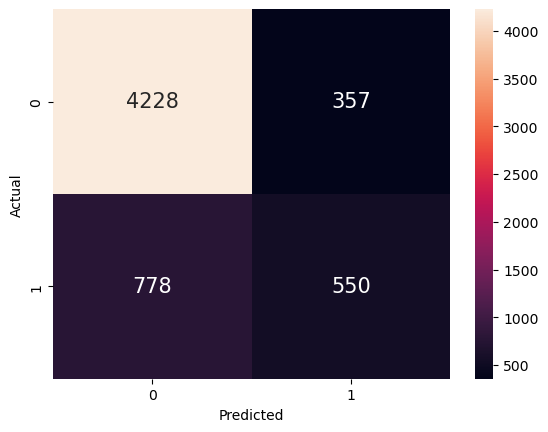

In [19]:
import seaborn as sn
#confusion matrix
cm = confusion_matrix(y_test, b_pred)
sn.heatmap(cm, annot=True, fmt='d',annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10);

In [20]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


### Deeplearning with 2 layers

Deep learning may overcome some of the challenges faced by machine learning algorithms, especially in handling unsupervised learning tasks involving transcribing images or texts. Some of the major issues faced while solving deep learning problems include large amounts of data and high computational power. Applications of deep learning include self-driving cars, image recognition, and speech recognition.

Ref: https://aws.amazon.com/what-is/deep-learning/#:~:text=Deep%20learning%20is%20a%20method,produce%20accurate%20insights%20and%20predictions.
https://www.mathworks.com/discovery/deep-learning.html


In [22]:
#shape of X_train 
X_train.shape

(23652, 28)

In [23]:
X_train_.shape

(30000, 28)

In [24]:
from keras.models import Sequential
from keras.layers import Dense

#Sequential model
modl = Sequential()

#First layer
modl.add(Dense(28, activation='relu',input_shape=(28,28)))

#Second layer
modl.add(Dense(1, activation='sigmoid'))

# compiling the model
modl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
modl.build()
modl.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 28, 28)            812       
                                                                 
 dense_5 (Dense)             (None, 28, 1)             29        
                                                                 
Total params: 841 (3.29 KB)
Trainable params: 841 (3.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
#fitting the model
modl.fit(X_train_scaled, y_train_, epochs=10, batch_size=32, validation_data=(X_valid_scaled, y_valid))


Epoch 1/10
938/938 [==============================] - 1s 446us/step - loss: 0.4784 - accuracy: 0.7935 - val_loss: 0.2565 - val_accuracy: 0.8900
Epoch 2/10
938/938 [==============================] - 0s 394us/step - loss: 0.4041 - accuracy: 0.8314 - val_loss: 0.1877 - val_accuracy: 0.9045
Epoch 3/10
938/938 [==============================] - 0s 394us/step - loss: 0.3939 - accuracy: 0.8350 - val_loss: 0.1796 - val_accuracy: 0.9031
Epoch 4/10
938/938 [==============================] - 0s 394us/step - loss: 0.3892 - accuracy: 0.8352 - val_loss: 0.1941 - val_accuracy: 0.8962
Epoch 5/10
938/938 [==============================] - 0s 398us/step - loss: 0.3866 - accuracy: 0.8373 - val_loss: 0.1657 - val_accuracy: 0.9070
Epoch 6/10
938/938 [==============================] - 0s 409us/step - loss: 0.3846 - accuracy: 0.8374 - val_loss: 0.1604 - val_accuracy: 0.9074
Epoch 7/10
938/938 [==============================] - 0s 453us/step - loss: 0.3834 - accuracy: 0.8365 - val_loss: 0.1810 - val_accuracy:

In [26]:
y_pred=modl.predict(X_test_scaled)

185/185 [==============================] - 0s 260us/step


In [27]:
#predicting the values
y_pred

array([[0.10827451],
       [0.22107576],
       [0.30310276],
       ...,
       [0.20403963],
       [0.08902427],
       [0.19429436]], dtype=float32)

In [28]:
b_pred = (y_pred > 0.5).astype(int)

In [29]:
#classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, b_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4585
           1       0.63      0.36      0.45      1328

    accuracy                           0.81      5913
   macro avg       0.73      0.65      0.67      5913
weighted avg       0.79      0.81      0.79      5913



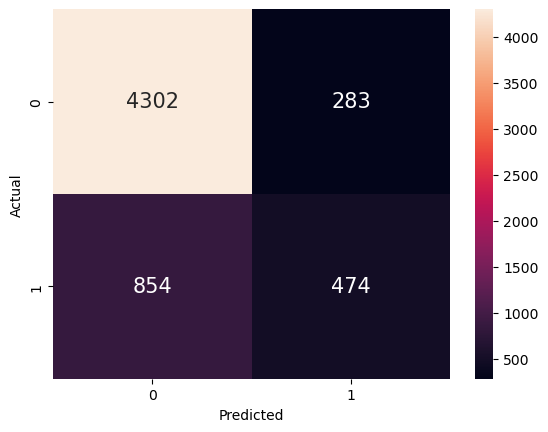

In [30]:
import seaborn as sn
#confusion matrix
cm = confusion_matrix(y_test, b_pred)
sn.heatmap(cm, annot=True, fmt='d',annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10);

### Ensemble model containing above top 3 models

Three methods are used by ensemble models: stacking, boosting, and bagging. Several machine learning models are studied in these methods in order to produce predictions as a group. Ensemble approaches seek to improve overall performance and accuracy by utilizing the advantages of various models, offering a strong and thorough prediction strategy.

Ref : https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/

In [31]:
#scaling
scaler = StandardScaler()
X_train_sc= scaler.fit_transform(X_train_sm)
X_test_sc = scaler.transform(X_test)

In [32]:
#top3 models: RandomForest, Logistic Regression and XGBoost
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
lr = LogisticRegression(C= 100, penalty= 'l2')
ens_model = VotingClassifier(estimators=[
    ('xgb', xgb),
    ('RF', rf),
    ('LR', lr)
], voting='hard')

rf = RandomForestClassifier(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
#fitting the models
ens_model.fit(X_train_sc, y_train_sm)
#predicting the values
y_pred_ensemble = ens_model.predict(X_test_sc)

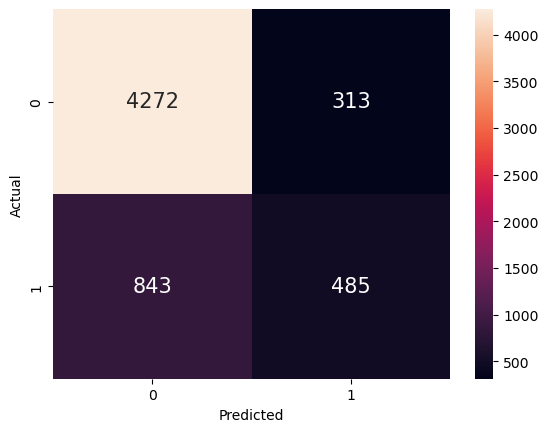

In [33]:
import seaborn as sn
#confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
sn.heatmap(cm, annot=True, fmt='d',annot_kws={"size":15})
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('Actual', fontsize=10);

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_ensemble))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4585
           1       0.61      0.37      0.46      1328

    accuracy                           0.80      5913
   macro avg       0.72      0.65      0.67      5913
weighted avg       0.78      0.80      0.79      5913

